In [37]:
function accuracy()
    ac=2400;
    return ac;
end

accuracy (generic function with 1 method)

In [38]:
setprecision(accuracy());

In [39]:
function order()
    M=10;
    return M+1;
end

order (generic function with 1 method)

In [40]:
function goon(A)
    A[end,:] = A[end,1];
    return A
end 

goon (generic function with 1 method)

In [41]:
function steps()
    h = BigFloat(1)/BigFloat(100)
    return h;
end

steps (generic function with 1 method)

In [42]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [43]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [44]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [45]:
function Sumxyz(k,x,y,Cki)
    s = sum(Cki[k+1,1:k+1].*reverse!(x).*y)
    return s
end 

Sumxyz (generic function with 1 method)

In [46]:
function Sumuw(k,u,w,Cki,x,z)  
    s = sum(Cki[k+1,1:k+1].*u.*reverse!(z)) + sum(Cki[k+1,1:k+1].*reverse!(w).*x)
    return s
end 

Sumuw (generic function with 1 method)

In [47]:
function Sumuv(k,u,v,Cki,x,y)
    s = sum(Cki[k+1,1:k+1].*u.*reverse!(y)) + sum(Cki[k+1,1:k+1].*reverse!(v).*x)
    return s
end 

Sumuv (generic function with 1 method)

In [48]:
function Talor(x,y,z,Cki,u,v,w)
    for k in 1:order()-1
        x[k+1] = c*(-x[k] + y[k])
        y[k+1] = R*x[k] - y[k] - Sumxyz(k-1,x[1:k],z[1:k],Cki)
        z[k+1] = Sumxyz(k-1,x[1:k],y[1:k],Cki) - b*z[k]
    end  
    for k in 1:order()-1
        u[k+1] = c*(-u[k] + v[k])
        v[k+1] = R*u[k] - v[k] - Sumuw(k-1,u[1:k],w[1:k],Cki,x[1:k],z[1:k])
        w[k+1] = Sumuv(k-1,u[1:k],v[1:k],Cki,x[1:k],y[1:k]) - b*w[k]
        #println(convert.(Float16,log10(abs(u[k]))),convert.(Float16,log10(abs(v[k]))),convert.(Float16,log10(abs(w[k]))))
    end
    return [x,y,z],[u,v,w]
end

Talor (generic function with 1 method)

In [49]:
function Iteration(x,y,z,Times,Cki,Lorenz,u,v,w,Ep)
    
    for st in 1:Times
    
        Tay,Tby = Talor(x,y,z,Cki,u,v,w)
        x = Tay[1]
        y = Tay[2]
        z = Tay[3]
        u = Tby[1]
        v = Tby[2]
        w = Tby[3]
        
        x[1] = sum(Dmulti[1:order()].*x[1:order()]);
        y[1] = sum(Dmulti[1:order()].*y[1:order()]);
        z[1] = sum(Dmulti[1:order()].*z[1:order()]);
        
        u[1] = sum(Dmulti[1:order()].*u[1:order()]);
        v[1] = sum(Dmulti[1:order()].*v[1:order()]);
        w[1] = sum(Dmulti[1:order()].*w[1:order()]);
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Ep[st] = (u[1] + v[1] +w[1])/(BigFloat(3)/BigFloat(1000)) 
        if mod(st,100) == 0
            println("t=",convert(Float16,st*steps())," Ep=",convert(Float16,log10(abs(Ep[st])))," x=",convert.(Float16,Lorenz[st,1]))
        end
    end
    
    return Lorenz,Ep
    
end

Iteration (generic function with 1 method)

In [50]:
#defining
setprecision(accuracy());

Times = 100*250;     #attension to use steps
a1 = BigFloat(10)^(-121)
a2 = BigFloat(10)^(-121)
a3 = BigFloat(10)^(-121)

c = BigFloat(10);
R = BigFloat(28) #+ BigFloat(1)/BigFloat(2);
b = BigFloat(8)/BigFloat(3);

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
x[1] = BigFloat(-15) - BigFloat(8)/BigFloat(10); 
y[1] = BigFloat(-17) - BigFloat(48)/BigFloat(100); 
z[1] = BigFloat(35) + BigFloat(64)/BigFloat(100);
u = Array{BigFloat}(undef,order())
v = Array{BigFloat}(undef,order())
w = Array{BigFloat}(undef,order())
u[1] = a1
v[1] = a2 
w[1] = a3

Lorenz = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Cki = Array{BigFloat}(undef,order()-1,order()-1);
Dmulti = Array{BigFloat}(undef,1,order());

Cki = DJCh();
Dmulti = multi();

In [51]:
#Main 
@time Lorenz,Ep = Iteration(x,y,z,Times,Cki,Lorenz,u,v,w,Ep);

t=1.0 Ep=-119.0 x=1.512
t=2.0 Ep=-117.3 x=-3.57
t=3.0 Ep=-117.1 x=-14.2
t=4.0 Ep=-116.7 x=-2.78
t=5.0 Ep=-116.3 x=-0.2627
t=6.0 Ep=-115.4 x=7.867
t=7.0 Ep=-115.4 x=6.086
t=8.0 Ep=-114.94 x=3.232
t=9.0 Ep=-113.8 x=-0.846
t=10.0 Ep=-114.0 x=11.44
t=11.0 Ep=-114.0 x=5.082
t=12.0 Ep=-114.2 x=11.31
t=13.0 Ep=-113.3 x=3.213
t=14.0 Ep=-112.3 x=12.086
t=15.0 Ep=-111.6 x=-15.56
t=16.0 Ep=-112.2 x=2.734
t=17.0 Ep=-111.06 x=7.766
t=18.0 Ep=-112.1 x=-9.71
t=19.0 Ep=-110.94 x=-0.5083
t=20.0 Ep=-110.44 x=-4.074
t=21.0 Ep=-110.3 x=15.414
t=22.0 Ep=-109.7 x=-1.909
t=23.0 Ep=-109.44 x=-1.349
t=24.0 Ep=-108.75 x=10.67
t=25.0 Ep=-107.1 x=15.65
t=26.0 Ep=-108.25 x=-3.488
t=27.0 Ep=-107.6 x=-11.51
t=28.0 Ep=-107.6 x=-6.156
t=29.0 Ep=-107.5 x=-1.126
t=30.0 Ep=-105.9 x=3.184
t=31.0 Ep=-106.4 x=-12.74
t=32.0 Ep=-105.5 x=-0.329
t=33.0 Ep=-105.2 x=-2.209
t=34.0 Ep=-104.6 x=13.336
t=35.0 Ep=-103.25 x=-14.61
t=36.0 Ep=-103.8 x=3.047
t=37.0 Ep=-102.75 x=10.71
t=38.0 Ep=-103.25 x=-10.29
t=39.0 Ep=-102.9 x=0.5
t=40.

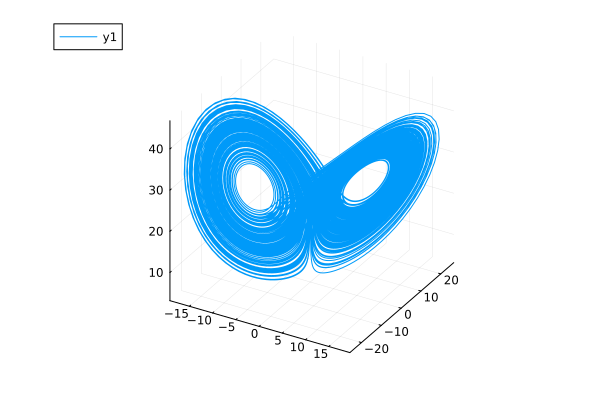

In [52]:
#drawing
using Plots; 
plot(Lorenz[:,1],Lorenz[:,2],Lorenz[:,3])

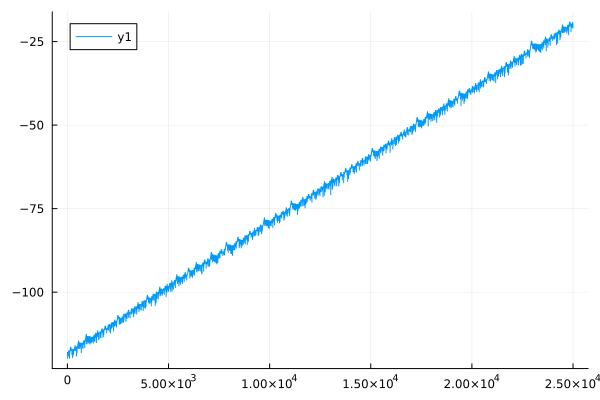

In [53]:
plot(1:Times,log10.(abs.(Ep)))

In [54]:
#write
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNEP_lorenz01p.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "Ep"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float32}(undef,Times)
for i in 1:Times
    AT[i]=i*steps()
end
#time-----------------------------------------------------
BE=convert.(Float32,log10.(abs.(Ep)));
#--------------------------------------------------------
Wfile(AT,BE,Times);